In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
t1 <- sample(paste0("Hospital ", toupper(letters)), size = 100, replace=TRUE)
t2 <- sample(x = c("Male", "Female")   , size = 100, replace=TRUE)
t3 <- floor(runif(100, min = 0, max = 110))
t4 <- sample(x = c("Survived", "Died") , size = 100, replace=TRUE)
t5  <- sample(paste0("Facility ", toupper(letters)), size = 100, replace=TRUE)

d <- data.frame(cbind(t1,t2,t3,t4, t5))
names(d) <- c('AdmittingHospital', 'Gender', 'AgeYears', 'Outcome', 'Dischargeto')



# Fix classses of columns
d$Gender <- as.factor(d$Gender)
d$Outcome <- as.factor(d$Outcome)
d$AgeYears <- as.integer(d$AgeYears)

d$AgeGroup <- cut(d$AgeYears, 
                  breaks = c(-Inf
                             ,5 ,10 ,15,20,25,30,35,40,45,50,55,60 ,65,70,75,80,85
                             , Inf), 
                  
                  labels = c("0-4 years"
                             ,"5-9 years","10-14 years","15-19 years","20-24 years"
                             ,"25-29 years","30-34 years","35-39 years","40-44 years"
                             ,"45-49 years","50-54 years","55-59 years","60-64 years"
                             ,"65-69 years","70-74 years","75-79 years","80-84 years"
                             ,"85+ years"),
                  right = FALSE)




d$Diag1 <- sample(x= c("A00.0","E00.0","F01.50","G00.0","H00.011"), size = 100, replace = TRUE)
d$Diag3 <- sample(x= c("Y70","Y71","Y72","Y73","Y74"), size = 100, replace = TRUE)
d$Diag4 <- sample(x= c("G00","G01","G02","G03","G04", "G05"), size = 100, replace = TRUE)
d$Diag2 <- sample(x= c("H00","H10","H15","H16","H28"), size = 100, replace = TRUE)
d$Diag5 <- sample(x= c("E00","E01","E02","E03","E04","E05"), size = 100, replace = TRUE)
d$Diag6 <- sample(x= c("E08","E09","E10","E11","E12", "E13"), size = 100, replace = TRUE)
d$Diag7 <- sample(x= c("E40","E41","E42","E43","E44"), size = 100, replace = TRUE)

In [3]:
d

AdmittingHospital,Gender,AgeYears,Outcome,Dischargeto,AgeGroup,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<fct>,<int>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hospital T,Female,78,Died,Facility A,75-79 years,A00.0,Y74,G05,H15,E01,E12,E44
Hospital H,Male,47,Died,Facility Y,45-49 years,H00.011,Y73,G04,H16,E05,E08,E44
Hospital F,Female,55,Died,Facility C,55-59 years,G00.0,Y72,G04,H10,E00,E10,E44
Hospital E,Male,42,Survived,Facility M,40-44 years,A00.0,Y72,G00,H10,E00,E12,E42
Hospital M,Male,48,Survived,Facility D,45-49 years,G00.0,Y74,G05,H16,E02,E12,E41
Hospital Y,Male,97,Died,Facility W,85+ years,F01.50,Y72,G02,H00,E01,E12,E41
Hospital B,Male,67,Survived,Facility P,65-69 years,F01.50,Y72,G03,H00,E02,E12,E41
Hospital D,Female,75,Died,Facility Z,75-79 years,A00.0,Y73,G04,H16,E04,E10,E43
Hospital Q,Male,34,Died,Facility E,30-34 years,H00.011,Y74,G00,H16,E00,E12,E42


Warning message:
"package 'ggplot2' was built under R version 4.3.3"


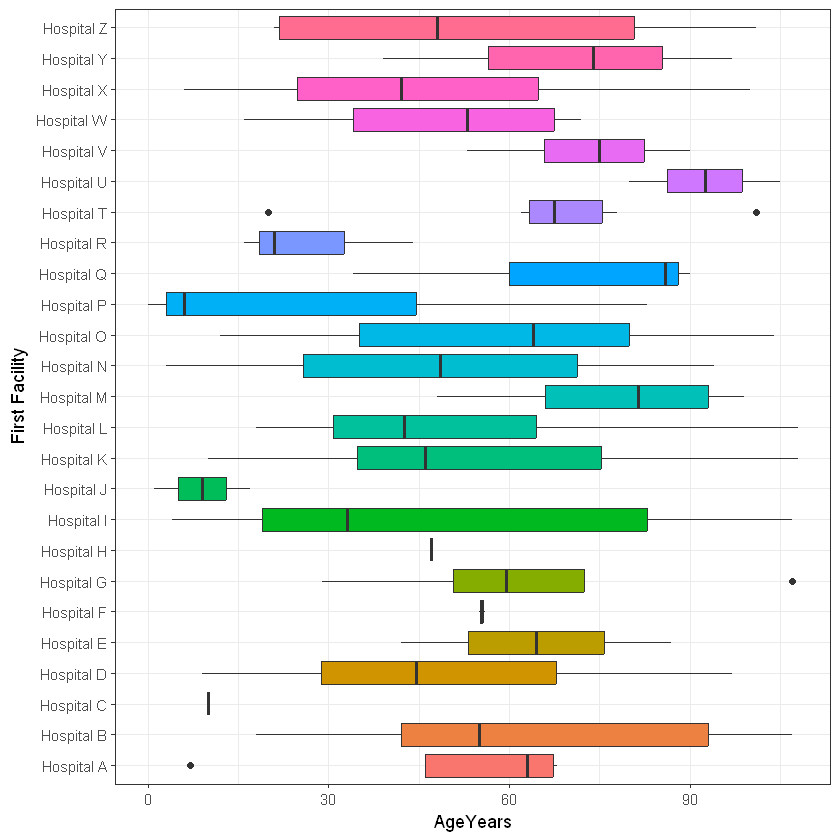

In [4]:
library(ggplot2)

d%>%
  dplyr::select(AdmittingHospital , AgeYears, starts_with("Diag") )%>%
  dplyr::mutate(AdultOrKid =  case_when( AgeYears  == 0   ~ "Newborn"
                                       , AgeYears <= 16   ~ "Paediatric"
                                       , AgeYears > 16    ~  "Adult"
                                       ))%>%
  dplyr::group_by(AdultOrKid)%>%
  dplyr::mutate(MeanAge = mean(AgeYears))%>%
  dplyr::relocate(Diag2, .after = Diag1)%>%
  dplyr::arrange(AdmittingHospital,AgeYears)%>%
  dplyr::rename(`First Facility` = AdmittingHospital)%>%
  ggplot(aes(x =`First Facility`, y = AgeYears, fill = `First Facility`)) + geom_boxplot() + theme_bw() +  coord_flip() + theme(legend.position = "none")

In [5]:
d1 <- d%>%
      dplyr::select(AdmittingHospital, Outcome)

d1

AdmittingHospital,Outcome
<chr>,<fct>
Hospital T,Died
Hospital H,Died
Hospital F,Died
Hospital E,Survived
Hospital M,Survived
Hospital Y,Died
Hospital B,Survived
Hospital D,Died
Hospital Q,Died


In [6]:
d2 <- d%>%
  dplyr::select(1,2)
d2

AdmittingHospital,Gender
<chr>,<fct>
Hospital T,Female
Hospital H,Male
Hospital F,Female
Hospital E,Male
Hospital M,Male
Hospital Y,Male
Hospital B,Male
Hospital D,Female
Hospital Q,Male


In [7]:
d3 <- d%>%
  dplyr::select(1:4)
d3

AdmittingHospital,Gender,AgeYears,Outcome
<chr>,<fct>,<int>,<fct>
Hospital T,Female,78,Died
Hospital H,Male,47,Died
Hospital F,Female,55,Died
Hospital E,Male,42,Survived
Hospital M,Male,48,Survived
Hospital Y,Male,97,Died
Hospital B,Male,67,Survived
Hospital D,Female,75,Died
Hospital Q,Male,34,Died


In [8]:
d4 <- d%>%
  dplyr::select(1, 3:5)

d4

AdmittingHospital,AgeYears,Outcome,Dischargeto
<chr>,<int>,<fct>,<chr>
Hospital T,78,Died,Facility A
Hospital H,47,Died,Facility Y
Hospital F,55,Died,Facility C
Hospital E,42,Survived,Facility M
Hospital M,48,Survived,Facility D
Hospital Y,97,Died,Facility W
Hospital B,67,Survived,Facility P
Hospital D,75,Died,Facility Z
Hospital Q,34,Died,Facility E


In [9]:
d5 <- d%>%
  dplyr::select(AdmittingHospital :Dischargeto)

d5

AdmittingHospital,Gender,AgeYears,Outcome,Dischargeto
<chr>,<fct>,<int>,<fct>,<chr>
Hospital T,Female,78,Died,Facility A
Hospital H,Male,47,Died,Facility Y
Hospital F,Female,55,Died,Facility C
Hospital E,Male,42,Survived,Facility M
Hospital M,Male,48,Survived,Facility D
Hospital Y,Male,97,Died,Facility W
Hospital B,Male,67,Survived,Facility P
Hospital D,Female,75,Died,Facility Z
Hospital Q,Male,34,Died,Facility E


In [10]:
d6 <- d%>%
  dplyr::select(starts_with("D"))

d6

Dischargeto,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Facility A,A00.0,Y74,G05,H15,E01,E12,E44
Facility Y,H00.011,Y73,G04,H16,E05,E08,E44
Facility C,G00.0,Y72,G04,H10,E00,E10,E44
Facility M,A00.0,Y72,G00,H10,E00,E12,E42
Facility D,G00.0,Y74,G05,H16,E02,E12,E41
Facility W,F01.50,Y72,G02,H00,E01,E12,E41
Facility P,F01.50,Y72,G03,H00,E02,E12,E41
Facility Z,A00.0,Y73,G04,H16,E04,E10,E43
Facility E,H00.011,Y74,G00,H16,E00,E12,E42


In [11]:
d7 <- d%>%
       dplyr::select(starts_with("Diag"))

d7

Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A00.0,Y74,G05,H15,E01,E12,E44
H00.011,Y73,G04,H16,E05,E08,E44
G00.0,Y72,G04,H10,E00,E10,E44
A00.0,Y72,G00,H10,E00,E12,E42
G00.0,Y74,G05,H16,E02,E12,E41
F01.50,Y72,G02,H00,E01,E12,E41
F01.50,Y72,G03,H00,E02,E12,E41
A00.0,Y73,G04,H16,E04,E10,E43
H00.011,Y74,G00,H16,E00,E12,E42


In [12]:
d8 <- d%>%
  dplyr::select(ends_with("1"))
d8

Diag1
<chr>
A00.0
H00.011
G00.0
A00.0
G00.0
F01.50
F01.50
A00.0
H00.011


In [13]:
d9 <- d%>%
  dplyr::select(ends_with(c("1","3")))
d9

Diag1,Diag3
<chr>,<chr>
A00.0,Y74
H00.011,Y73
G00.0,Y72
A00.0,Y72
G00.0,Y74
F01.50,Y72
F01.50,Y72
A00.0,Y73
H00.011,Y74


In [14]:
d10 <-d%>%
  dplyr::select(contains("Age"))
d10

AgeYears,AgeGroup
<int>,<fct>
78,75-79 years
47,45-49 years
55,55-59 years
42,40-44 years
48,45-49 years
97,85+ years
67,65-69 years
75,75-79 years
34,30-34 years


In [15]:
d11 <- d%>%
  dplyr::select(-Gender)
d11

AdmittingHospital,AgeYears,Outcome,Dischargeto,AgeGroup,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<int>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hospital T,78,Died,Facility A,75-79 years,A00.0,Y74,G05,H15,E01,E12,E44
Hospital H,47,Died,Facility Y,45-49 years,H00.011,Y73,G04,H16,E05,E08,E44
Hospital F,55,Died,Facility C,55-59 years,G00.0,Y72,G04,H10,E00,E10,E44
Hospital E,42,Survived,Facility M,40-44 years,A00.0,Y72,G00,H10,E00,E12,E42
Hospital M,48,Survived,Facility D,45-49 years,G00.0,Y74,G05,H16,E02,E12,E41
Hospital Y,97,Died,Facility W,85+ years,F01.50,Y72,G02,H00,E01,E12,E41
Hospital B,67,Survived,Facility P,65-69 years,F01.50,Y72,G03,H00,E02,E12,E41
Hospital D,75,Died,Facility Z,75-79 years,A00.0,Y73,G04,H16,E04,E10,E43
Hospital Q,34,Died,Facility E,30-34 years,H00.011,Y74,G00,H16,E00,E12,E42


In [16]:
d12 <- d%>%
  dplyr::select(-c(Gender,AgeYears,AgeGroup     ))
d12

AdmittingHospital,Outcome,Dischargeto,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hospital T,Died,Facility A,A00.0,Y74,G05,H15,E01,E12,E44
Hospital H,Died,Facility Y,H00.011,Y73,G04,H16,E05,E08,E44
Hospital F,Died,Facility C,G00.0,Y72,G04,H10,E00,E10,E44
Hospital E,Survived,Facility M,A00.0,Y72,G00,H10,E00,E12,E42
Hospital M,Survived,Facility D,G00.0,Y74,G05,H16,E02,E12,E41
Hospital Y,Died,Facility W,F01.50,Y72,G02,H00,E01,E12,E41
Hospital B,Survived,Facility P,F01.50,Y72,G03,H00,E02,E12,E41
Hospital D,Died,Facility Z,A00.0,Y73,G04,H16,E04,E10,E43
Hospital Q,Died,Facility E,H00.011,Y74,G00,H16,E00,E12,E42


In [17]:
d13 <- d%>%
  dplyr::select(`First Hospital` = AdmittingHospital 
                , Diag_primary =  Diag1 )
d13

First Hospital,Diag_primary
<chr>,<chr>
Hospital T,A00.0
Hospital H,H00.011
Hospital F,G00.0
Hospital E,A00.0
Hospital M,G00.0
Hospital Y,F01.50
Hospital B,F01.50
Hospital D,A00.0
Hospital Q,H00.011


In [18]:
# Note that the syntax is New Name =  Old Name

d14 <- d%>%
  dplyr::select(AdmittingHospital , Diag1 )%>%
  dplyr::rename(Diagnostic_01 = Diag1)
d14

AdmittingHospital,Diagnostic_01
<chr>,<chr>
Hospital T,A00.0
Hospital H,H00.011
Hospital F,G00.0
Hospital E,A00.0
Hospital M,G00.0
Hospital Y,F01.50
Hospital B,F01.50
Hospital D,A00.0
Hospital Q,H00.011


In [19]:
# Some relocate features

d15 <- d%>%
       dplyr::relocate(Outcome)
d15

Outcome,AdmittingHospital,Gender,AgeYears,Dischargeto,AgeGroup,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<fct>,<chr>,<fct>,<int>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Died,Hospital T,Female,78,Facility A,75-79 years,A00.0,Y74,G05,H15,E01,E12,E44
Died,Hospital H,Male,47,Facility Y,45-49 years,H00.011,Y73,G04,H16,E05,E08,E44
Died,Hospital F,Female,55,Facility C,55-59 years,G00.0,Y72,G04,H10,E00,E10,E44
Survived,Hospital E,Male,42,Facility M,40-44 years,A00.0,Y72,G00,H10,E00,E12,E42
Survived,Hospital M,Male,48,Facility D,45-49 years,G00.0,Y74,G05,H16,E02,E12,E41
Died,Hospital Y,Male,97,Facility W,85+ years,F01.50,Y72,G02,H00,E01,E12,E41
Survived,Hospital B,Male,67,Facility P,65-69 years,F01.50,Y72,G03,H00,E02,E12,E41
Died,Hospital D,Female,75,Facility Z,75-79 years,A00.0,Y73,G04,H16,E04,E10,E43
Died,Hospital Q,Male,34,Facility E,30-34 years,H00.011,Y74,G00,H16,E00,E12,E42


In [20]:
d16 <- d%>%
  dplyr::relocate(AgeYears, .before = AgeGroup)
d16

AdmittingHospital,Gender,Outcome,Dischargeto,AgeYears,AgeGroup,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<fct>,<fct>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hospital T,Female,Died,Facility A,78,75-79 years,A00.0,Y74,G05,H15,E01,E12,E44
Hospital H,Male,Died,Facility Y,47,45-49 years,H00.011,Y73,G04,H16,E05,E08,E44
Hospital F,Female,Died,Facility C,55,55-59 years,G00.0,Y72,G04,H10,E00,E10,E44
Hospital E,Male,Survived,Facility M,42,40-44 years,A00.0,Y72,G00,H10,E00,E12,E42
Hospital M,Male,Survived,Facility D,48,45-49 years,G00.0,Y74,G05,H16,E02,E12,E41
Hospital Y,Male,Died,Facility W,97,85+ years,F01.50,Y72,G02,H00,E01,E12,E41
Hospital B,Male,Survived,Facility P,67,65-69 years,F01.50,Y72,G03,H00,E02,E12,E41
Hospital D,Female,Died,Facility Z,75,75-79 years,A00.0,Y73,G04,H16,E04,E10,E43
Hospital Q,Male,Died,Facility E,34,30-34 years,H00.011,Y74,G00,H16,E00,E12,E42


In [21]:
d17 <- d%>%
  dplyr::relocate(AgeYears, .after = AgeGroup)
d17

AdmittingHospital,Gender,Outcome,Dischargeto,AgeGroup,AgeYears,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<chr>,<fct>,<fct>,<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hospital T,Female,Died,Facility A,75-79 years,78,A00.0,Y74,G05,H15,E01,E12,E44
Hospital H,Male,Died,Facility Y,45-49 years,47,H00.011,Y73,G04,H16,E05,E08,E44
Hospital F,Female,Died,Facility C,55-59 years,55,G00.0,Y72,G04,H10,E00,E10,E44
Hospital E,Male,Survived,Facility M,40-44 years,42,A00.0,Y72,G00,H10,E00,E12,E42
Hospital M,Male,Survived,Facility D,45-49 years,48,G00.0,Y74,G05,H16,E02,E12,E41
Hospital Y,Male,Died,Facility W,85+ years,97,F01.50,Y72,G02,H00,E01,E12,E41
Hospital B,Male,Survived,Facility P,65-69 years,67,F01.50,Y72,G03,H00,E02,E12,E41
Hospital D,Female,Died,Facility Z,75-79 years,75,A00.0,Y73,G04,H16,E04,E10,E43
Hospital Q,Male,Died,Facility E,30-34 years,34,H00.011,Y74,G00,H16,E00,E12,E42


In [22]:
d18 <- d%>%
  dplyr::relocate(where(is.character))
d18

AdmittingHospital,Dischargeto,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7,Gender,AgeYears,Outcome,AgeGroup
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>,<fct>,<fct>
Hospital T,Facility A,A00.0,Y74,G05,H15,E01,E12,E44,Female,78,Died,75-79 years
Hospital H,Facility Y,H00.011,Y73,G04,H16,E05,E08,E44,Male,47,Died,45-49 years
Hospital F,Facility C,G00.0,Y72,G04,H10,E00,E10,E44,Female,55,Died,55-59 years
Hospital E,Facility M,A00.0,Y72,G00,H10,E00,E12,E42,Male,42,Survived,40-44 years
Hospital M,Facility D,G00.0,Y74,G05,H16,E02,E12,E41,Male,48,Survived,45-49 years
Hospital Y,Facility W,F01.50,Y72,G02,H00,E01,E12,E41,Male,97,Died,85+ years
Hospital B,Facility P,F01.50,Y72,G03,H00,E02,E12,E41,Male,67,Survived,65-69 years
Hospital D,Facility Z,A00.0,Y73,G04,H16,E04,E10,E43,Female,75,Died,75-79 years
Hospital Q,Facility E,H00.011,Y74,G00,H16,E00,E12,E42,Male,34,Died,30-34 years


In [23]:
d19 <- d%>%
  dplyr::relocate(where(is.factor))
d19

Gender,Outcome,AgeGroup,AdmittingHospital,AgeYears,Dischargeto,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<fct>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Female,Died,75-79 years,Hospital T,78,Facility A,A00.0,Y74,G05,H15,E01,E12,E44
Male,Died,45-49 years,Hospital H,47,Facility Y,H00.011,Y73,G04,H16,E05,E08,E44
Female,Died,55-59 years,Hospital F,55,Facility C,G00.0,Y72,G04,H10,E00,E10,E44
Male,Survived,40-44 years,Hospital E,42,Facility M,A00.0,Y72,G00,H10,E00,E12,E42
Male,Survived,45-49 years,Hospital M,48,Facility D,G00.0,Y74,G05,H16,E02,E12,E41
Male,Died,85+ years,Hospital Y,97,Facility W,F01.50,Y72,G02,H00,E01,E12,E41
Male,Survived,65-69 years,Hospital B,67,Facility P,F01.50,Y72,G03,H00,E02,E12,E41
Female,Died,75-79 years,Hospital D,75,Facility Z,A00.0,Y73,G04,H16,E04,E10,E43
Male,Died,30-34 years,Hospital Q,34,Facility E,H00.011,Y74,G00,H16,E00,E12,E42


In [24]:
d20 <- d%>%
  dplyr::relocate(where(is.numeric))
d20

AgeYears,AdmittingHospital,Gender,Outcome,Dischargeto,AgeGroup,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7
<int>,<chr>,<fct>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
78,Hospital T,Female,Died,Facility A,75-79 years,A00.0,Y74,G05,H15,E01,E12,E44
47,Hospital H,Male,Died,Facility Y,45-49 years,H00.011,Y73,G04,H16,E05,E08,E44
55,Hospital F,Female,Died,Facility C,55-59 years,G00.0,Y72,G04,H10,E00,E10,E44
42,Hospital E,Male,Survived,Facility M,40-44 years,A00.0,Y72,G00,H10,E00,E12,E42
48,Hospital M,Male,Survived,Facility D,45-49 years,G00.0,Y74,G05,H16,E02,E12,E41
97,Hospital Y,Male,Died,Facility W,85+ years,F01.50,Y72,G02,H00,E01,E12,E41
67,Hospital B,Male,Survived,Facility P,65-69 years,F01.50,Y72,G03,H00,E02,E12,E41
75,Hospital D,Female,Died,Facility Z,75-79 years,A00.0,Y73,G04,H16,E04,E10,E43
34,Hospital Q,Male,Died,Facility E,30-34 years,H00.011,Y74,G00,H16,E00,E12,E42


In [25]:
d21 <- d%>%
  dplyr::relocate(where(is.character))%>%
  dplyr::relocate(where(is.factor), .after = where(is.character))
d21

AdmittingHospital,Dischargeto,Diag1,Diag3,Diag4,Diag2,Diag5,Diag6,Diag7,Gender,Outcome,AgeGroup,AgeYears
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<int>
Hospital T,Facility A,A00.0,Y74,G05,H15,E01,E12,E44,Female,Died,75-79 years,78
Hospital H,Facility Y,H00.011,Y73,G04,H16,E05,E08,E44,Male,Died,45-49 years,47
Hospital F,Facility C,G00.0,Y72,G04,H10,E00,E10,E44,Female,Died,55-59 years,55
Hospital E,Facility M,A00.0,Y72,G00,H10,E00,E12,E42,Male,Survived,40-44 years,42
Hospital M,Facility D,G00.0,Y74,G05,H16,E02,E12,E41,Male,Survived,45-49 years,48
Hospital Y,Facility W,F01.50,Y72,G02,H00,E01,E12,E41,Male,Died,85+ years,97
Hospital B,Facility P,F01.50,Y72,G03,H00,E02,E12,E41,Male,Survived,65-69 years,67
Hospital D,Facility Z,A00.0,Y73,G04,H16,E04,E10,E43,Female,Died,75-79 years,75
Hospital Q,Facility E,H00.011,Y74,G00,H16,E00,E12,E42,Male,Died,30-34 years,34
